In [3]:

from pathlib import Path
from h5py import File
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display
import json

In [4]:
dataset_path = Path('../../data/dataset.hdf5')
final_assignements = {}
init_assignements = {}
metadata = {}
points_coords = {}
with File(dataset_path) as cache:
    for k,v in cache["final_assignements"].items():
        final_assignements[k] = np.copy(v)
    for k,v in cache["init_assignements"].items():
        init_assignements[k] = np.copy(v)
    for k,v in cache["metadata"].items():
        arr = np.copy(v)
        metadata[k] = {"SEED": arr[0], "NUM_CLUST": arr[1], "NUM_POINTS": arr[2], 
                       "INIT_CHOICE": arr[3], 
                       "IMPR_CLASS": arr[4], 
                       "IT_ORDER": arr[5], 
                       "init_cost": arr[6], "final_cost": arr[7], "num_iter": arr[8], "num_iter_glob": arr[9], "duration": arr[10],"dataset_key":k}
    for k,v in cache["points_coords"].items():
        points_coords[k] = np.copy(v)
df_number = pd.DataFrame(list(metadata.values()))
df = df_number.copy()
df.loc[df["INIT_CHOICE"] == 0,"INIT_CHOICE"] = "random"
df.loc[df["INIT_CHOICE"] == 1,"INIT_CHOICE"] = "kmeans+"
df.loc[df["IMPR_CLASS"] == 0,"IMPR_CLASS"] = "BI"
df.loc[df["IMPR_CLASS"] == 1,"IMPR_CLASS"] = "FI"
df.loc[df["IT_ORDER"] == 0,"IT_ORDER"] = "BACK"
df.loc[df["IT_ORDER"] != 0,"IT_ORDER"] = "other"
df_src = df.copy()
print(len(df["SEED"].unique()))
# print(df["IMPR_CLASS"].unique())
# print(df["INIT_CHOICE"].unique())
# display(df[df["INIT_CHOICE"] == "random"])

8000


C:\Users\robin\AppData\Local\Temp\ipykernel_6912\2826789981.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_sel.hist(bins=100,ax=ax)


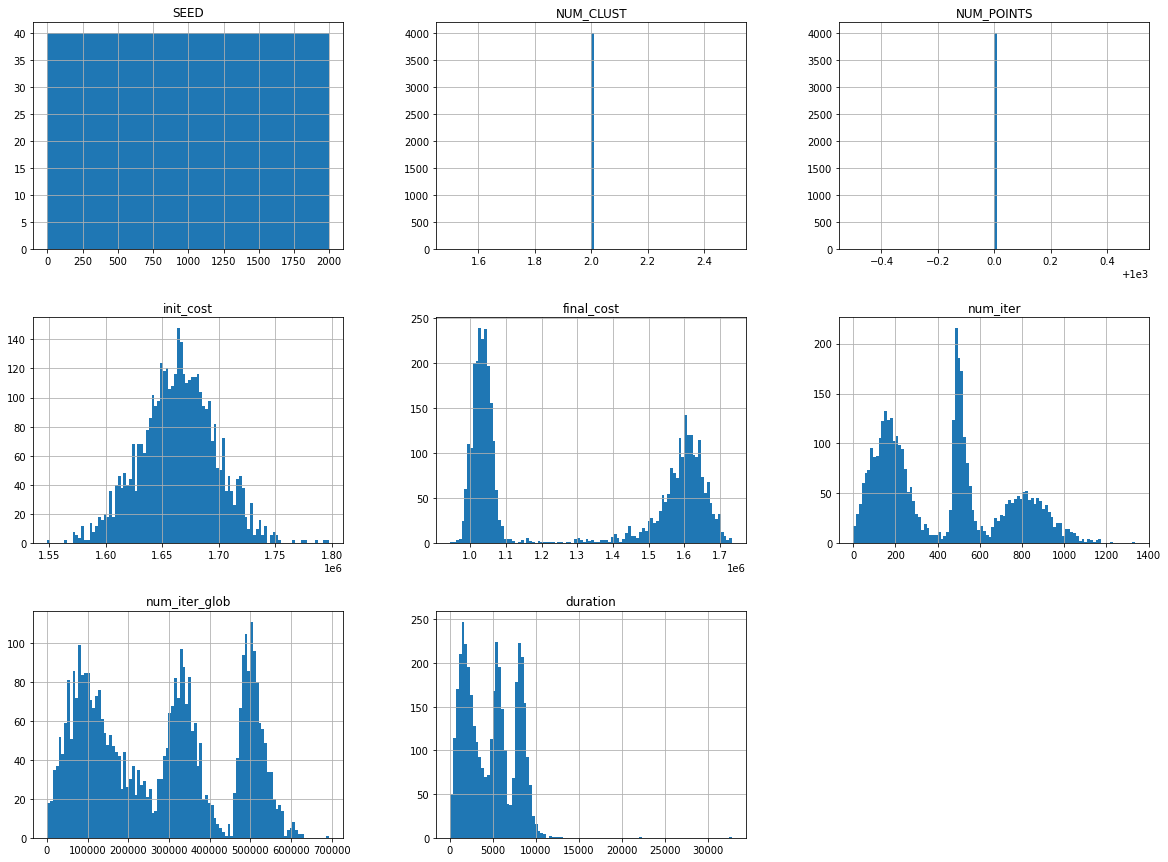

In [5]:
df_sel = df.query("NUM_CLUST == 2")
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_sel.hist(bins=100,ax=ax)
fig.savefig(str(dataset_path.parent.parent / './images/dataset_stats.jpg'))

In [6]:

df["category"] = df["IMPR_CLASS"].astype(str)+"_"+df["INIT_CHOICE"].astype(str)
for num_clust in df["NUM_CLUST"].unique():
    df_tmp = df.query(f"NUM_CLUST == {num_clust}")
    for attr in ["init_cost","num_iter","num_iter_glob","duration","final_cost"]:
        fig = px.histogram(df_tmp,x=attr,color="category",nbins=1000)    
        fig.write_image(str(dataset_path.parent.parent / f'./images/dataset_stats_{attr}_{num_clust}_clust.jpg'))
fig.show()

In [7]:
df_cpy = df.copy()
try:
    df_cpy.drop(columns=["category"],inplace=True)
except KeyError:
    pass
df_orig = df_cpy.copy()
df_cpy.loc[df_cpy["IT_ORDER"]=="BACK","IT_ORDER"] = 0
df_cpy.loc[df_cpy["IT_ORDER"]=="other","IT_ORDER"] = -1
df_cpy.loc[df_cpy["INIT_CHOICE"]=="random","INIT_CHOICE"] = 0
df_cpy.loc[df_cpy["INIT_CHOICE"]=="kmeans+","INIT_CHOICE"] = 1
Ldf = []
for impr in ["FI","BI"]:
    df_impr = df_cpy.query(f"IMPR_CLASS == \'{impr}\'")
    df_impr = df_impr.drop(columns=["IMPR_CLASS","dataset_key"])
    df_impr.set_index("SEED",inplace=True)
    Ldf.append(df_impr)
new_df = (Ldf[0]-Ldf[1])
df_infos = df_orig.copy().query("IMPR_CLASS=='BI'").set_index("SEED")
for k in ["init_cost",attr,"num_iter","num_iter_glob","duration"]:
    df_infos[k] = new_df[k]
df_infos.reset_index(inplace=True)
display(df_infos)

,SEED,NUM_CLUST,NUM_POINTS,INIT_CHOICE,IMPR_CLASS,IT_ORDER,init_cost,final_cost,num_iter,num_iter_glob,duration,dataset_key
0,0.0,2.0,1000.0,random,BI,other,0.0,1.746230e-09,388.0,-182750.0,-5612.0,"0,0,2,0,0"
1,1.0,2.0,1000.0,kmeans+,BI,other,0.0,2.328306e-10,4.0,-31326.0,-584.0,"1,0,2,1,0"
2,10.0,2.0,1000.0,kmeans+,BI,other,0.0,2.095476e-09,12.0,-53101.0,-1018.0,"10,0,2,1,0"
3,100.0,2.0,1000.0,random,BI,other,0.0,9.313226e-10,334.0,-148342.0,-2071.0,"100,0,2,0,0"
4,1000.0,2.0,1000.0,kmeans+,BI,other,0.0,1.696674e+01,38.0,-68504.0,-1126.0,"1000,0,2,1,0"
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,995.0,2.0,1000.0,kmeans+,BI,other,0.0,-6.984919e-10,2.0,-75311.0,-1327.0,"995,0,2,1,0"
7996,996.0,2.0,1000.0,random,BI,other,0.0,-2.211891e-09,468.0,-143814.0,-2336.0,"996,0,2,0,0"
7997,997.0,2.0,1000.0,random,BI,other,0.0,5.387252e+05,-261.0,-496329.0,-7840.0,"997,0,2,0,0"
7998,998.0,2.0,1000.0,kmeans+,BI,other,0.0,-4.656613e-10,18.0,-58256.0,-780.0,"998,0,2,1,0"


In [8]:
# num_clust = 2
# attr = attr
for num_clust in [4,8,16,2]:
    df_tmp = df_infos.query(f"NUM_CLUST == {num_clust}")
    for attr in ["init_cost","num_iter","num_iter_glob","duration","final_cost"]:
        df_rand = df_tmp.query(f"INIT_CHOICE == \'random\'")
        df_kmeans = df_tmp.query(f"INIT_CHOICE == \'kmeans+\'")
        fig = px.histogram(df_tmp,x=attr,color="INIT_CHOICE",
                           color_discrete_map = {'random':'blue','kmeans+':'red'},
                           histnorm="percent",
                           range_y=None, #if attr != "final_cost" else [0,5],
                           barmode="overlay",
                           nbins=500,title="FI-BI (mean in dotted line) "+ f"Mean random:{df_rand[attr].mean():.2f} ; "+f"Mean kmeans+:{df_kmeans[attr].mean():.2f}")  
        fig.add_vline(x=df_rand[attr].mean(),
               line=dict(dash= 'dot',color='blue')
               )
        fig.add_vline(x=df_kmeans[attr].mean(),
               line=dict(dash= 'dot',color='red')
               )
   
        fig.write_image(str(dataset_path.parent.parent / f'./images/dataset_stats_{attr}_{num_clust}_FI-BI_clust.jpg'))
fig.show()

In [9]:

dico_backup_best = {}
for attr in ["final_cost","duration"]:
   if attr not in dico_backup_best:
      dico_backup_best[attr] = {}
   for num_clust in [2,4,8,16]:
      df_tmp = df_infos.query(f"NUM_CLUST == {num_clust}")
      df_tmpcpy = df_tmp.copy()
      df_tmp.loc[df_tmpcpy[attr] > 0,attr] = "BI"
      df_tmp.loc[df_tmpcpy[attr] < 0,attr] = "FI"
      df_tmp.loc[df_tmpcpy[attr] == 0,attr] = "Equal"
      if num_clust not in dico_backup_best[attr]:
         dico_backup_best[attr][num_clust] = {}
      for index, row in df_tmp.iterrows():
         dico_backup_best[attr][num_clust][row["dataset_key"]] = row[attr]
      fig = px.histogram(df_tmp,x=attr,
                           #    histnorm="percent",
                              range_y=None, #if attr != "final_cost" else [0,5],
                           #    barmode="overlay",
                              nbins=500,title="Suggestions")
      fig.write_image(str(dataset_path.parent.parent / f'./images/dataset_stats_suggestions_{attr}_{num_clust}_clust.jpg'))
with open(str(dataset_path.parent / f'./dico_best.json'), 'w') as fp:
   json.dump(dico_backup_best, fp,indent=4)
fig.show()


C:\Users\robin\AppData\Local\Temp\ipykernel_6912\2316747468.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\robin\AppData\Local\Temp\ipykernel_6912\2316747468.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\robin\AppData\Local\Temp\ipykernel_6912\2316747468.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [15]:
import matplotlib.pyplot as plt
from h5py import File
from pathlib import Path
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
[0. 1. 2. 3.]


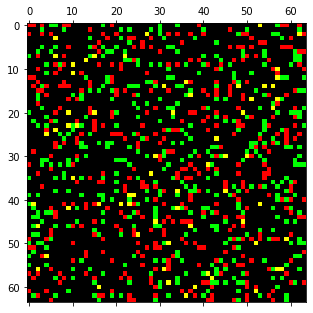

In [32]:

with File(str(Path("../../data/dataset_ia_2_clusters_grid_64px.hdf5").resolve()),"r") as f:
    k = list(f["input"].keys())[0]
    array = np.copy(f["input"][k])
shape = (*array.shape[:2],1)
zeros = np.zeros(shape)
array = np.concatenate((array,zeros),axis=-1)
print(array.shape)
print(np.unique(array))
fig = plt.figure(figsize=(5,5))
plt.matshow(array, fignum=1)

In [33]:
df = df_src.copy().query("NUM_CLUST == 2 & IMPR_CLASS == 'BI'")
df.sort_values(by=['dataset_key'],inplace=True)
for grid in [64,128,256,512]:
    dico_clust_overlap = {}
    with File(str(Path(f"../../data/dataset_ia_2_clusters_grid_{grid}px.hdf5").resolve()),"r") as f:
        for k in f["input"]:
            dico_clust_overlap[k] = np.max(np.copy(f["input"][k]))
            
    elements = [dico_clust_overlap[k] for k in sorted(list(dico_clust_overlap.keys()))]
    df[f"grid_{grid}px_overlap"] = elements


In [34]:
cols = [*[f"grid_{grid}px_overlap" for grid in [64,128,256,512]],"INIT_CHOICE"]
df_aggr=df[cols].copy().groupby("INIT_CHOICE").min()
display(df_aggr)
df_aggr=df[cols].copy().groupby("INIT_CHOICE").mean()
display(df_aggr)
df_aggr=df[cols].copy().groupby("INIT_CHOICE").max()
display(df_aggr)


,grid_64px_overlap,grid_128px_overlap,grid_256px_overlap,grid_512px_overlap
INIT_CHOICE,,,,
kmeans+,3.0,2.0,2.0,1.0
random,2.0,2.0,1.0,1.0


,grid_64px_overlap,grid_128px_overlap,grid_256px_overlap,grid_512px_overlap
INIT_CHOICE,,,,
kmeans+,3.417004,2.449393,2.046559,1.865385
random,2.970356,2.129447,1.981225,1.579051


,grid_64px_overlap,grid_128px_overlap,grid_256px_overlap,grid_512px_overlap
INIT_CHOICE,,,,
kmeans+,5.0,4.0,3.0,3.0
random,4.0,4.0,3.0,2.0
